

**2020 with 7 technology**

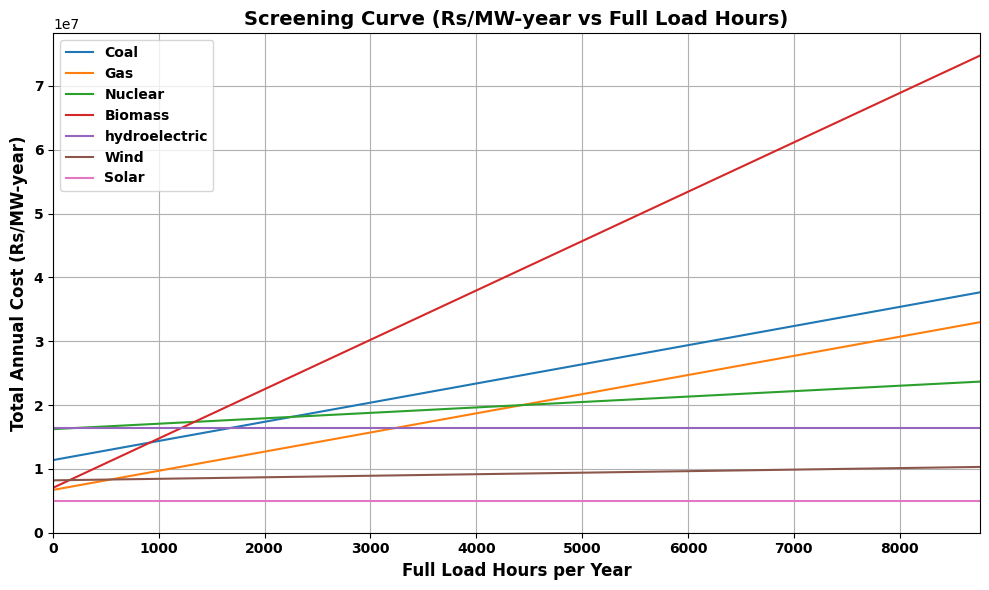

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hourly range from 0 to 8760 hours (full year)
hours = np.linspace(0, 8760, 300)

# Data per technology
techs = {
    'Coal': {
        'fixed': 11379000,
        'variable': 3000
    },
    'Gas': {
        'fixed': 6704100,
        'variable': 3000
    },
    'Nuclear': {
        'fixed': 16228800,
        'variable':850
    },
    'Biomass': {
        'fixed':7034000,
        'variable': 7730
    }, # Added comma here
    'hydroelectric': {
        'fixed':16476000,
        'variable': 0  #$/kWh
    }, # Added comma here
    'Wind': {
        'fixed':8205800,
        'variable': 240  # $/kWh
    }, # Added comma here
    'Solar': {
        'fixed':4983000,
        'variable': 0  # $/kWh
    }
}

# Plotting each curve
plt.figure(figsize=(10, 6))
for tech, cost in techs.items():
    total_cost = cost['fixed'] + cost['variable'] * hours
    plt.plot(hours, total_cost, label=tech)

# Formatting
plt.title("Screening Curve (Rs/MW-year vs Full Load Hours)")
plt.xlabel("Full Load Hours per Year")
plt.ylabel("Total Annual Cost (Rs/MW-year)")
plt.xlim(0, 8760)
plt.ylim(0, None)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**ldc**

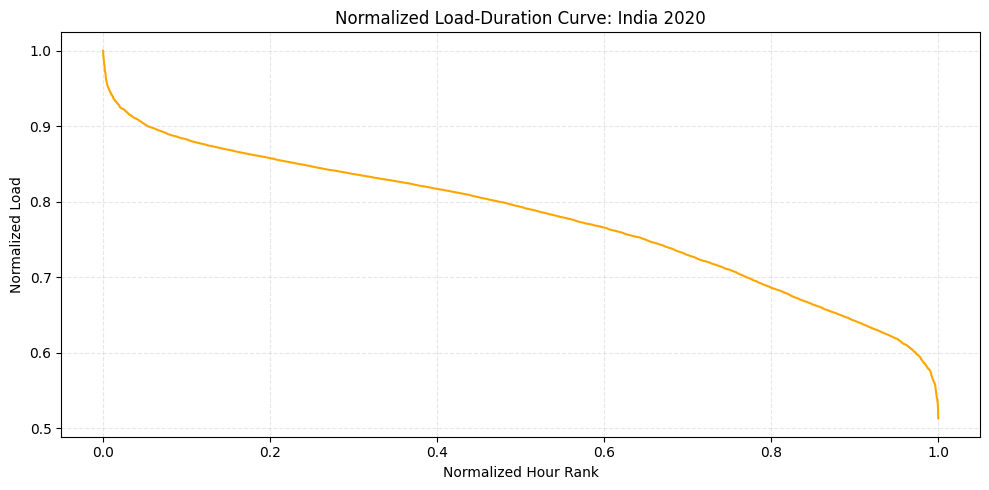

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the 2020 hourly load profile
df = pd.read_csv('India_2020_Hourly_Load.csv', parse_dates=['Datetime'])

# 2. Sort load in descending order to create the load-duration curve
sorted_load = df['Load_MW'].sort_values(ascending=False).reset_index(drop=True)

# 3. Normalize axes
n = len(sorted_load)
x_norm = np.arange(n) / (n - 1)             # Normalized hour rank (0 to 1)
y_norm = sorted_load / sorted_load.max()    # Normalized load (0 to 1)

# 4. Plot the normalized load-duration curve
plt.figure(figsize=(10, 5))
plt.plot(x_norm, y_norm, color='orange', linewidth=1.5)
plt.xlabel('Normalized Hour Rank')
plt.ylabel('Normalized Load')
plt.title('Normalized Load-Duration Curve: India 2020')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**fit**

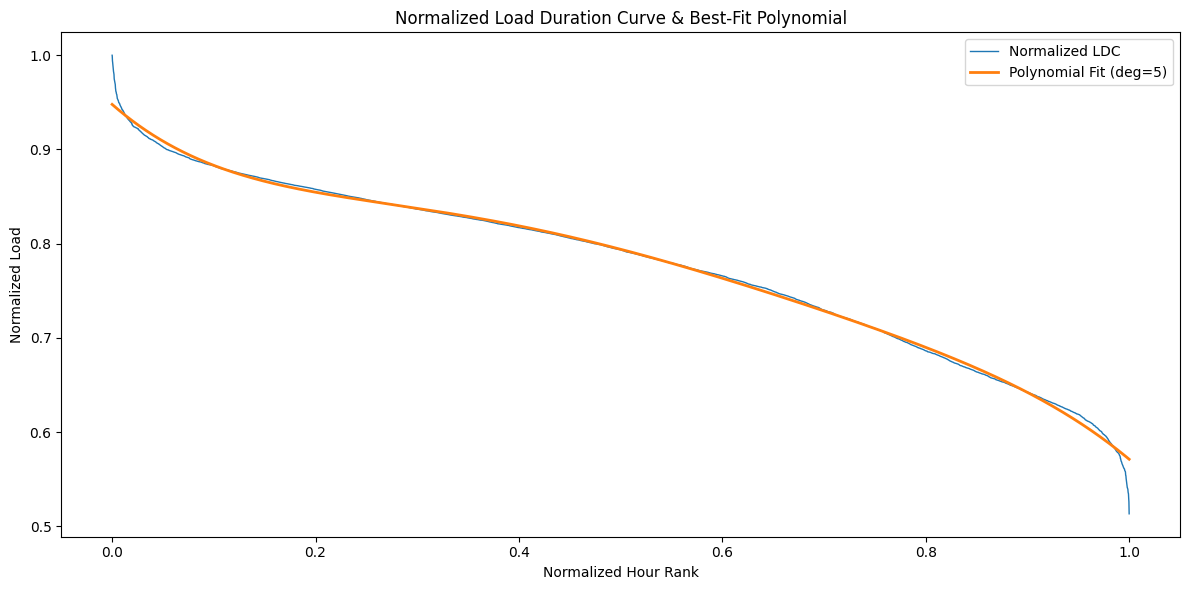

Polynomial coefficients (highest degree first):
[-2.84724577  7.76679755 -8.08624412  3.73795923 -0.94789656  0.94786094]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the modified 2030 profile CSV
df = pd.read_csv('India_2020_Hourly_Load.csv', parse_dates=['Datetime'])

# Create a load-duration curve
sorted_load = df['Load_MW'].sort_values(ascending=False).reset_index(drop=True)
n = len(sorted_load)

# Normalize axes
x = sorted_load.index / (n - 1)          # Normalized hour rank (0–1)
y = sorted_load / sorted_load.max()      # Normalized load (0–1)

# Fit a polynomial of chosen degree
degree = 5
coeffs = np.polyfit(x, y, degree)
poly = np.poly1d(coeffs)

# Generate fitted curve
x_fit = np.linspace(0, 1, n)
y_fit = poly(x_fit)

# Plot original and fitted curves
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Normalized LDC', linewidth=1)
plt.plot(x_fit, y_fit, label=f'Polynomial Fit (deg={degree})', linewidth=2)
plt.xlabel('Normalized Hour Rank')
plt.ylabel('Normalized Load')
plt.title('Normalized Load Duration Curve & Best-Fit Polynomial')
plt.legend()
plt.tight_layout()
plt.show()

# Print coefficients
print("Polynomial coefficients (highest degree first):")
print(coeffs)

**polynomial with coefficient**--[-2.84724577  7.76679755 -8.08624412  3.73795923 -0.94789656  0.94786094]

**For getting x and ar in list**(note - we can directly use the polynomial coefficient instead of xlsx file)

In [ ]:
import pandas as pd

# === Parameters ===
file_path = '/content/Polynomial_Fit_Values.xlsx'           # Path to your Excel file
sheet_name = 'Sheet1'                  # Sheet name to read from
column_name_1 = 'x'       # The column you want to extract
column_name_2 = 'u_ar'       # The column you want to extract

# === Load the Excel sheet ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# === Convert the specified column to a list ===
xx_i = df[column_name_1].dropna().tolist()
ar_i = df[column_name_2].dropna().tolist()

# === Output sample ===
print(xx_i)
print(ar_i)


[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.0]
[9.113178537869083e-05, 0.00016826050693338868, 0.0002327590884527464, 0.00028592862582488277, 0.00032900009538484046, 0.0003631360622620305, 0.0003894323887277185, 0.0004089199425424717, 0.00042256630530365766, 0.0004312774807928244, 0.00043589960332323985, 0.0004372206460873462, 0.0004359721295041

In [ ]:
print(len(ar_i))

101


In [ ]:
print(len(xx_i))

102


In [ ]:
x_i=[ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.0]

for y values

In [ ]:
import numpy as np

def evaluate_polynomial(coefficients, x_values):
    """
    Evaluates a polynomial for a given list of x values.

    Args:
        coefficients (list): The coefficients of the polynomial in descending order of power.
        x_values (list): A list of x values to evaluate the polynomial at.

    Returns:
        list: A list of y values corresponding to the evaluated polynomial.
    """
    # Create a polynomial object
    poly = np.poly1d(coefficients)

    # Evaluate the polynomial at each x value
    y_values = poly(x_values)

    return y_values

# Given polynomial coefficients
polynomial_coefficients = [-2.84724577, 7.76679755, -8.08624412, 3.73795923, -0.94789656, 0.94786094]

# Assuming x_i is a list of 100 values
# For demonstration, we create a sample list using numpy.linspace
x_i = np.linspace(0, 1, 101)

# Get the list of y_i values
y_i = evaluate_polynomial(polynomial_coefficients, x_i)

# Print the first 5 values to show the result
print("First 5 y_i values:", y_i)

First 5 y_i values: [0.94786094 0.93874776 0.93033474 0.9225761  0.91542788 0.90884788
 0.90279561 0.89723229 0.8921208  0.88742561 0.88311284 0.87915012
 0.87550661 0.87215298 0.86906133 0.86620519 0.86355948 0.86110047
 0.85880573 0.85665414 0.8546258  0.85270206 0.85086542 0.84909954
 0.84738919 0.84572023 0.84407953 0.84245501 0.84083555 0.83921096
 0.83757196 0.83591017 0.83421802 0.83248876 0.83071639 0.82889567
 0.82702206 0.82509167 0.82310126 0.8210482  0.81893039 0.81674629
 0.81449486 0.81217551 0.80978807 0.80733279 0.80481026 0.80222141
 0.79956746 0.79684988 0.79407037 0.79123082 0.78833327 0.7853799
 0.78237294 0.77931472 0.77620756 0.77305376 0.76985559 0.76661523
 0.76333473 0.76001601 0.75666078 0.75327056 0.74984658 0.74638981
 0.74290088 0.73938008 0.73582728 0.73224197 0.72862313 0.72496929
 0.72127842 0.71754795 0.7137747  0.70995487 0.70608398 0.70215688
 0.69816766 0.69410965 0.68997539 0.68575657 0.68144403 0.67702767
 0.6724965  0.66783853 0.66304076 0.6580891

In [ ]:
y_i = [0.94786094, 0.93874776, 0.93033474, 0.92257610, 0.91542788, 0.90884788,
       0.90279561, 0.89723229, 0.89212080, 0.88742561, 0.88311284, 0.87915012,
       0.87550661, 0.87215298, 0.86906133, 0.86620519, 0.86355948, 0.86110047,
       0.85880573, 0.85665414, 0.85462580, 0.85270206, 0.85086542, 0.84909954,
       0.84738919, 0.84572023, 0.84407953, 0.84245501, 0.84083555, 0.83921096,
       0.83757196, 0.83591017, 0.83421802, 0.83248876, 0.83071639, 0.82889567,
       0.82702206, 0.82509167, 0.82310126, 0.82104820, 0.81893039, 0.81674629,
       0.81449486, 0.81217551, 0.80978807, 0.80733279, 0.80481026, 0.80222141,
       0.79956746, 0.79684988, 0.79407037, 0.79123082, 0.78833327, 0.78537990,
       0.78237294, 0.77931472, 0.77620756, 0.77305376, 0.76985559, 0.76661523,
       0.76333473, 0.76001601, 0.75666078, 0.75327056, 0.74984658, 0.74638981,
       0.74290088, 0.73938008, 0.73582728, 0.73224197, 0.72862313, 0.72496929,
       0.72127842, 0.71754795, 0.71377470, 0.70995487, 0.70608398, 0.70215688,
       0.69816766, 0.69410965, 0.68997539, 0.68575657, 0.68144403, 0.67702767,
       0.67249650, 0.66783853, 0.66304076, 0.65808916, 0.65296863, 0.64766295,
       0.64215477, 0.63642555, 0.63045554, 0.62422377, 0.61770795, 0.61088451,
       0.60372851, 0.59621364, 0.58831218, 0.57999494, 0.57123127]


In [ ]:
print(len(y_i))

101


In [ ]:
ar_i=[9.113178537869083e-05, 0.00016826050693338868, 0.0002327590884527464, 0.00028592862582488277, 0.00032900009538484046, 0.0003631360622620305, 0.0003894323887277185, 0.0004089199425424717, 0.00042256630530365766, 0.0004312774807928244, 0.00043589960332323985, 0.0004372206460873462, 0.0004359721295041419, 0.00043283082956678824, 0.0004284204861899066, 0.00042331351155720396, 0.0004180326984687566, 0.00041305292868865973, 0.00040880288129232947, 0.00040566674101407687, 0.0004039859065944895, 0.000404060699128006, 0.0004061520704101662, 0.00041048331128536116, 0.00041724175999399704, 0.0004265805105202714, 0.0004386201209393104, 0.0004534503217648789, 0.00047113172429666725, 0.0004916975289679382, 0.0005151552336928689, 0.0005414883422140093, 0.0005706580724495936, 0.0006026050648416171, 0.0006372510907023565, 0.0006745007605626352, 0.0007142432325189607, 0.0007563539205808989, 0.0008006962030186937, 0.0008471231307106476, 0.0008954791354907609, 0.000945601738495887, 0.0009973232585133152, 0.0010504725203285227, 0.001104876563072116, 0.0011603623485677205, 0.0012167584696793053, 0.001273896858658592, 0.0013316144954923493, 0.0013897551162504462, 0.001448170921432561, 0.001506724284316241, 0.0015652894593039168, 0.0016237542902711845, 0.0016820219189124298, 0.001740012493091099, 0.0017976648751840143, 0.0018549383504316561, 0.001911814335283577, 0.001968298085747455, 0.0020244204057347994, 0.0020802393554095653, 0.0021358419595366883, 0.002191345915826233, 0.002246901303284804, 0.0023026922905596448, 0.0023589388442886595, 0.002415898437445847, 0.002473867757690838, 0.0025331844157137962, 0.002594228653585462, 0.002657425053103015, 0.0027232442441376702, 0.0027922046129829382, 0.00286487401070204, 0.002941871461473542, 0.003023868870940606, 0.0031115927345593455, 0.003205825845943742, 0.0033074090052135578, 0.0034172427273451668, 0.00353628895051481, 0.0036655727444464127, 0.003806184018762888, 0.0039592792313291325, 0.004126083096603763, 0.004307890293979477, 0.004506067176141473, 0.004722053477404108, 0.004957364022063993, 0.005213590432746201, 0.005492402838754886, 0.005795551584413582, 0.006124868937417747, 0.006482270797184498, 0.006869758403192776, 0.00728942004333867, 0.0077434327622739295, 0.00823406406976536, 0.008763673649031745, 0.571231]

In [ ]:
print(len(x_i))

101


**data for var-covar matrix**

In [ ]:
import pandas as pd

# === Parameters ===
file_path = '/content/fuel cost.xlsx'           # Path to your Excel file
sheet_name = 'Sheet1'                  # Sheet name to read from
column_name_1 = 'coal_inr/mwh'       # The column you want to extract
column_name_2 = 'gas_inr/mwh'       # The column you want to extract
column_name_3 = 'nuclear_inr/mwh'       # The column you want to extract
column_name_4 = 'solar_inr/mwh'       # The column you want to extract
column_name_5 = 'wind_inr/mwh'       # The column you want to extract
column_name_6 = 'hydro_inr/mwh'       # The column you want to extract
column_name_7 = 'biomass_inr/mwh'       # The column you want to extract

# === Load the Excel sheet ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# === Convert the specified column to a list ===
c_i = df[column_name_1].dropna().tolist()
g_i = df[column_name_2].dropna().tolist()
n_i = df[column_name_3].dropna().tolist()
s_i = df[column_name_4].dropna().tolist()
w_i = df[column_name_5].dropna().tolist()
h_i = df[column_name_6].dropna().tolist()
b_i = df[column_name_7].dropna().tolist()

# === Output sample ===
print(c_i)
print(g_i)


FileNotFoundError: [Errno 2] No such file or directory: '/content/fuel cost.xlsx'

**for var-covar matrix**

In [ ]:
import numpy as np

# Define the six datasets (each of length 12)
data = np.array([
    c_i, g_i, n_i, s_i, w_i, h_i, b_i
])

# Compute the 6x6 variance-covariance matrix
# Set rowvar=False because rows are variables
cov_matrix = np.cov(data, rowvar=True)

# Print result
print("7x Variance-Covariance Matrix:")
print(cov_matrix)

NameError: name 'c_i' is not defined

**problem formulation**

Mathematical Formulation(for three tech and n=8784 block system)

Objective Function to Minimize
\begin{equation}
\begin{bmatrix}\frac{1}{x_1} & \frac{1}{x_2} & \frac{1}{x_3} & ...\frac{1}{1(x_n=1)} \end{bmatrix}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
1298.92 \\ 765.3 \\ 1852.6 \\568.8356\\936.73\\1880.82\\802.96
\end{bmatrix}
\end{equation}

\begin{equation}
+ \left(
\begin{bmatrix}
a_1 + a_2 + ... a_{n} \\
b_1 + b_2 + ... b_{n} \\
c_1 + c_2 + ... c_{n} \\
d_1 + d_2 + ... d_{n} \\
e_1 + e_2 + ... e_{n} \\
f_1 + f_2 + ... f_{n} \\  
g_1 + g_2 + ... g_{n}
\end{bmatrix}
\right)^T
\begin{bmatrix}
3000 \\ 3000 \\ 850 \\0 \\240\\0\\7730
\end{bmatrix}
\end{equation}

\begin{equation}
+ \beta \cdot
\begin{bmatrix} 1 & 1 & ... 1({n}^{th}  time)  \end{bmatrix}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
 1.10686156e+04 & 2.54173535e+03 & -1.08122548e+02 & 0.0 & 0.0 & 0.0 & 0.0\\
2.54173535e+03 &  9.58623700e+03 & -2.54375665e+01 & 0.0 & 0.0 & 0.0 & 0.0\\
-1.08122548e+02 & -2.54375665e+01 & 2.34660478e+00   & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0
\end{bmatrix}
\begin{bmatrix}
a_1 & a_2 & . & a_{n}  \\
b_1 & b_2 & . & b_{n}  \\
c_1 & c_2 & . & c_{n}  \\
d_1 & d_2 & . & d_{n}  \\
e_1 & e_2 & . & e_{n}  \\
f_1 & f_2 & . & f_{n}  \\
g_1 & g_2 & . & g_{n}
\end{bmatrix}
\begin{bmatrix}
1 \\ 1 \\ 1 \\ . \\ 1({n}^{th}  time)
\end{bmatrix}
\end{equation}

Constraints
\begin{equation}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
1 \\ 1 \\ 1 \\ 1 \\ 1\\1\\1
\end{bmatrix}
=
\begin{bmatrix}
ar_1 \\ ar_2 \\ . \\ ar_{n}
\end{bmatrix}
\end{equation}

\begin{equation}
a_i, b_i, c_i, d_i, e_i, f_i , g_i \geq 0
\end{equation}

**solution**

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd

# Provided data
n = 101
x = np.array(x_i)
ar = np.array(ar_i)

# Change beta here as needed
beta = 0

fixed_cost = np.array([1298.92, 765.3, 1852.6, 568.8356, 936.73,1880.82, 802.96])
var_cost = np.array([3000, 3000, 850, 0, 240, 0 , 7730])

cov = np.zeros((7, 7))
cov[0:3, 0:3] = np.array([
    [11068.6156, 2541.73535, -108.122548],
    [2541.73535, 9586.237, -25.4375665],
    [-108.122548, -25.4375665, 2.34660478]
])

A = cp.Variable((n, 7), nonneg=True)

term1 = cp.sum(cp.sum(cp.multiply(A, fixed_cost), axis=1) / x)
term2 = cp.sum(cp.sum(A, axis=0) * var_cost)
S = cp.sum(A, axis=0)
risk_term = cp.quad_form(S, cov)
term3 = beta * risk_term

constraints = [
    cp.sum(A, axis=1) == ar,
    A >= 0
]

objective = cp.Minimize(term1 + term2 + term3)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.OSQP, verbose=True)

solution = A.value
# Round off all numbers with more than 5 zeros after decimal to 0
solution[np.abs(solution) < 0.00001] = 0.0

columns = ['a', 'b', 'c', 'd', 'e', 'f','g']
df = pd.DataFrame(solution, columns=columns)
df['x'] = x
df['ar'] = ar

# Make beta "pretty" in filename, e.g. 0.1 → 0p1, 2 → 2, 0.05 → 0p05
beta_str = str(beta).replace('.', 'p')
filename = f'solution_beta_{beta_str}.csv'
df.to_csv(filename, index=False)

print(f"Optimization complete. Solution saved as {filename}.")


/usr/local/lib/python3.12/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
(CVXPY) Aug 27 07:27:17 PM: Your problem has 707 variables, 808 constraints, and 0 parameters.
(CVXPY) Aug 27 07:27:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 27 07:27:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 27 07:27:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 27 07:27:17 PM: Your problem is compiled with the CPP canonica

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-----------------------------------------------------------------
           OSQP v1.0.0  -  Operator Splitting QP Solver
              (c) The OSQP Developer Team
-----------------------------------------------------------------
problem:  variables n = 714, constraints m = 1522
          nnz(P) + nnz(A) = 2835
settings: algebra = Built-in,
          OSQPInt

**for plotting values**(note needs both solution and x and y along with ar values)

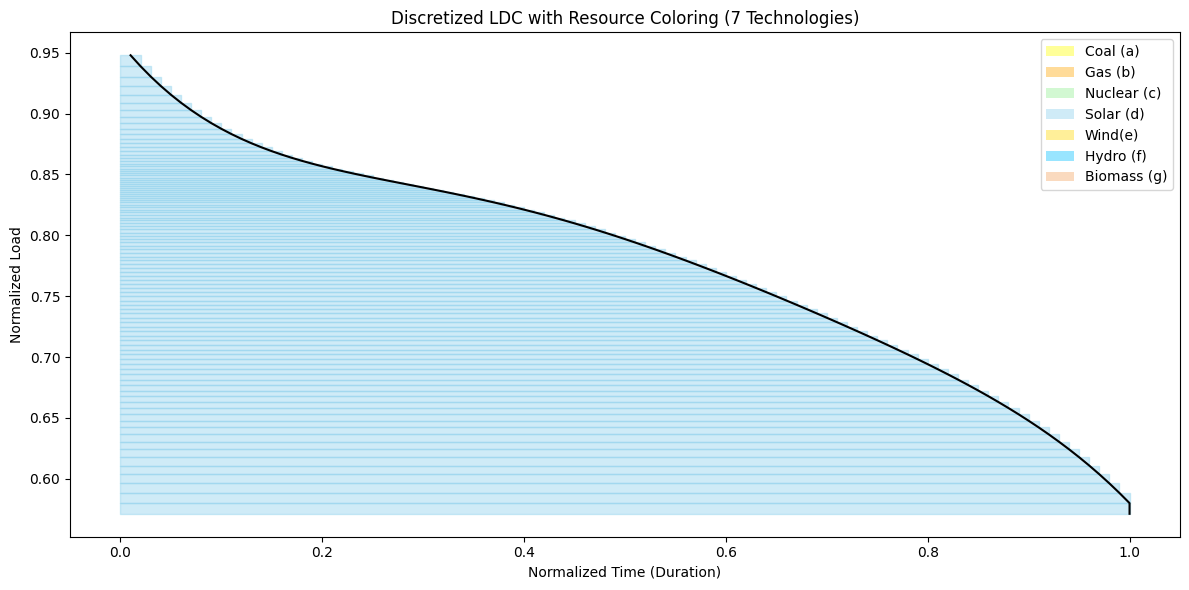

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

# =========================
# 1) Load the LDC points (x_i, y_i, ar_i) from EXCEL
# =========================
ldc_path = Path("/content/Polynomial_Fit_Values.xlsx")

# Read Excel directly (this is an .xlsx, not a CSV)
df = pd.read_excel(ldc_path)

# Clean headers and keep needed columns
df.columns = [str(c).strip() for c in df.columns]
needed_cols = ["x_i", "y_i", "ar_i"]
missing = [c for c in needed_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in {ldc_path.name}: {missing}. "
                     f"Expected {needed_cols}")

df = df[needed_cols].copy()
df = df.apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)

# =========================
# 2) Load 7-tech allocations per block from CSV
#    Expected columns: a,b,c,d,e,f,g  (coal, gas, nuclear, wind, solar, hydro, biomass)
# =========================
alloc_path = Path("/content/solution_beta_0.csv")

# Try utf-8 first, then fall back to latin1 if needed
try:
    alloc_df = pd.read_csv(alloc_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    alloc_df = pd.read_csv(alloc_path, encoding="latin1")

alloc_df.columns = [str(c).strip() for c in alloc_df.columns]
tech_cols = ["a","b","c","d","e","f","g"]
missing_alloc = [c for c in tech_cols if c not in alloc_df.columns]
if missing_alloc:
    raise ValueError(f"Missing columns in {alloc_path.name}: {missing_alloc}. "
                     f"Expected {tech_cols}")

# Convert to numeric and zero-out tiny noise (<1e-5)
alloc_df = alloc_df[tech_cols].apply(pd.to_numeric, errors="coerce")
alloc_df = alloc_df.fillna(0.0)
alloc = alloc_df.to_numpy()
alloc[np.abs(alloc) < 1e-5] = 0.0

# Align lengths if files differ (trim to the shorter)
n = min(len(df), len(alloc))
if len(df) != len(alloc):
    print(f"[info] Row count mismatch: LDC={len(df)}, alloc={len(alloc)}. Using first {n} rows.")
df = df.iloc[:n].reset_index(drop=True)
alloc = alloc[:n, :]

# =========================
# 3) Color mapping & tech names
# =========================
tech_names = ['coal','gas','nuclear','solar','wind','hydro','biomass']  # a..g
color_map = {
    'coal'   : 'yellow',       # a
    'gas'    : 'orange',       # b
    'nuclear': 'lightgreen',   # c
    'solar'   : 'skyblue',     # d
    'wind'  : 'gold',          # e
    'hydro'  : 'deepskyblue',  # f
    'biomass': 'sandybrown'    # g
}

# =========================
# 4) Plot each block colored by the dominant tech
# =========================
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n - 1):
    # dominant tech index for block i
    idx = int(np.argmax(alloc[i, :]))
    tech = tech_names[idx]
    color = color_map[tech]

    x_next = df.loc[i+1, "x_i"]
    y_n    = df.loc[i,   "y_i"]
    y_np1  = df.loc[i+1, "y_i"]

    ax.fill_between([0, x_next],
                    [y_np1, y_np1],
                    [y_n,   y_n  ],
                    color=color, alpha=0.4)

# Overlay the discretized curve (y_i vs x_i)
ax.plot(df["x_i"], df["y_i"], color='black', linewidth=1.5, label='LDC')

# Labels & title
ax.set_xlabel("Normalized Time (Duration)")
ax.set_ylabel("Normalized Load")
ax.set_title("Discretized LDC with Resource Coloring (7 Technologies)")

# Legend
legend_elements = [
    Patch(facecolor=color_map['coal'],    alpha=0.4, label='Coal (a)'),
    Patch(facecolor=color_map['gas'],     alpha=0.4, label='Gas (b)'),
    Patch(facecolor=color_map['nuclear'], alpha=0.4, label='Nuclear (c)'),
    Patch(facecolor=color_map['solar'],    alpha=0.4, label='Solar (d)'),
    Patch(facecolor=color_map['wind'],   alpha=0.4, label='Wind(e)'),
    Patch(facecolor=color_map['hydro'],   alpha=0.4, label='Hydro (f)'),
    Patch(facecolor=color_map['biomass'], alpha=0.4, label='Biomass (g)'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


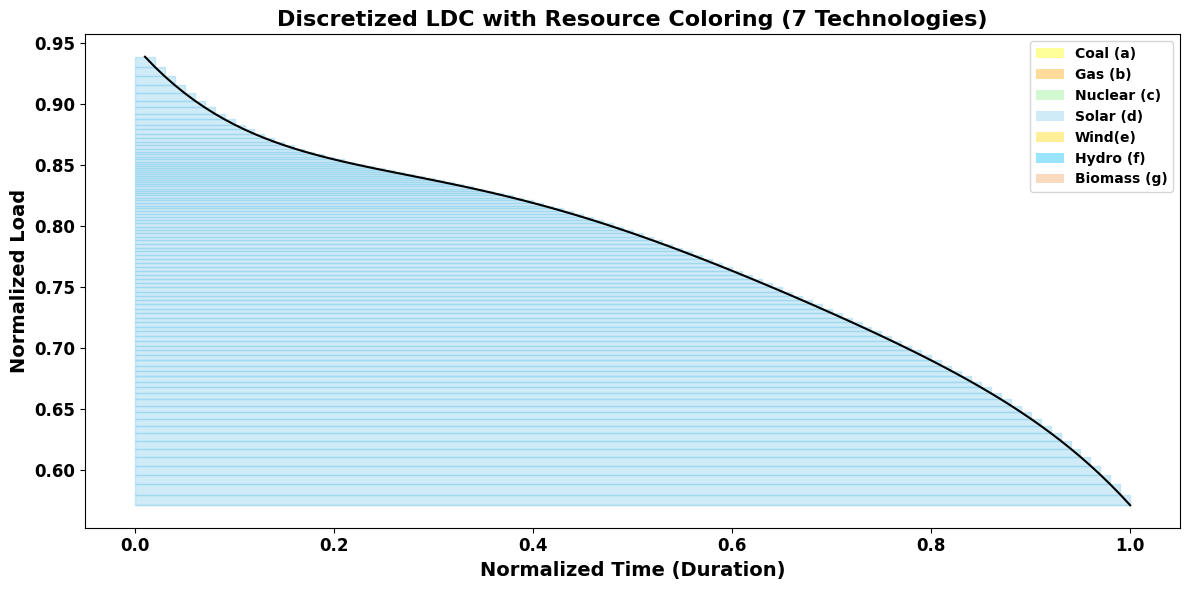

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

# =========================
# 1) Use the loaded x_i, y_i, ar_i data
# =========================
# Assuming x_i, y_i, and ar_i are already loaded in the previous cell
# If not, uncomment the following lines and adjust the path as needed:
# import pandas as pd
# df_solution = pd.read_csv('/content/solution_beta_0.csv')
# x_i = df_solution['x'].tolist()
# ar_i = df_solution['ar'].tolist()
# # You might need to regenerate y_i if it's not in the CSV or recalculate based on a polynomial
# # y_i = ... # code to get y_i


# Create a DataFrame from the lists for consistent processing
df = pd.DataFrame({'x_i': x_i, 'y_i': y_i, 'ar_i': ar_i})


# =========================
# 2) Load 7-tech allocations per block from CSV
#    Expected columns: a,b,c,d,e,f,g  (coal, gas, nuclear, wind, solar, hydro, biomass)
# =========================
alloc_path = Path("/content/solution_beta_0.csv")

# Try utf-8 first, then fall back to latin1 if needed
try:
    alloc_df = pd.read_csv(alloc_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    alloc_df = pd.read_csv(alloc_path, encoding="latin1")

alloc_df.columns = [str(c).strip() for c in alloc_df.columns]
tech_cols = ["a","b","c","d","e","f","g"]
missing_alloc = [c for c in tech_cols if c not in alloc_df.columns]
if missing_alloc:
    raise ValueError(f"Missing columns in {alloc_path.name}: {missing_alloc}. "
                     f"Expected {tech_cols}")

# Convert to numeric and zero-out tiny noise (<1e-5)
alloc_df = alloc_df[tech_cols].apply(pd.to_numeric, errors="coerce")
alloc_df = alloc_df.fillna(0.0)
alloc = alloc_df.to_numpy()
alloc[np.abs(alloc) < 1e-5] = 0.0

# Align lengths if files differ (trim to the shorter)
n = min(len(df), len(alloc))
if len(df) != len(alloc):
    print(f"[info] Row count mismatch: LDC={len(df)}, alloc={len(alloc)}. Using first {n} rows.")
df = df.iloc[:n].reset_index(drop=True)
alloc = alloc[:n, :]

# =========================
# 3) Color mapping & tech names
# =========================
tech_names = ['coal','gas','nuclear','solar','wind','hydro','biomass']  # a..g
color_map = {
    'coal'   : 'yellow',       # a
    'gas'    : 'orange',       # b
    'nuclear': 'lightgreen',   # c
    'solar'   : 'skyblue',     # d
    'wind'  : 'gold',          # e
    'hydro'  : 'deepskyblue',  # f
    'biomass': 'sandybrown'    # g
}

# =========================
# 4) Plot each block colored by the dominant tech
# =========================
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n - 1):
    # dominant tech index for block i
    idx = int(np.argmax(alloc[i, :]))
    tech = tech_names[idx]
    color = color_map[tech]

    x_next = df.loc[i+1, "x_i"]
    y_n    = df.loc[i,   "y_i"]
    y_np1  = df.loc[i+1, "y_i"]

    ax.fill_between([0, x_next],
                    [y_np1, y_np1],
                    [y_n,   y_n  ],
                    color=color, alpha=0.4)

# Overlay the discretized curve (y_i vs x_i)
ax.plot(df["x_i"], df["y_i"], color='black', linewidth=1.5, label='LDC')

# Labels & title
ax.set_xlabel("Normalized Time (Duration)", fontsize=14, fontweight='bold')
ax.set_ylabel("Normalized Load", fontsize=14, fontweight='bold')
ax.set_title("Discretized LDC with Resource Coloring (7 Technologies)", fontsize=16, fontweight='bold')

# Tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


# Legend
legend_elements = [
    Patch(facecolor=color_map['coal'],    alpha=0.4, label='Coal (a)'),
    Patch(facecolor=color_map['gas'],     alpha=0.4, label='Gas (b)'),
    Patch(facecolor=color_map['nuclear'], alpha=0.4, label='Nuclear (c)'),
    Patch(facecolor=color_map['solar'],    alpha=0.4, label='Solar (d)'),
    Patch(facecolor=color_map['wind'],   alpha=0.4, label='Wind(e)'),
    Patch(facecolor=color_map['hydro'],   alpha=0.4, label='Hydro (f)'),
    Patch(facecolor=color_map['biomass'], alpha=0.4, label='Biomass (g)'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12,  prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

**2030 with 7 tech**

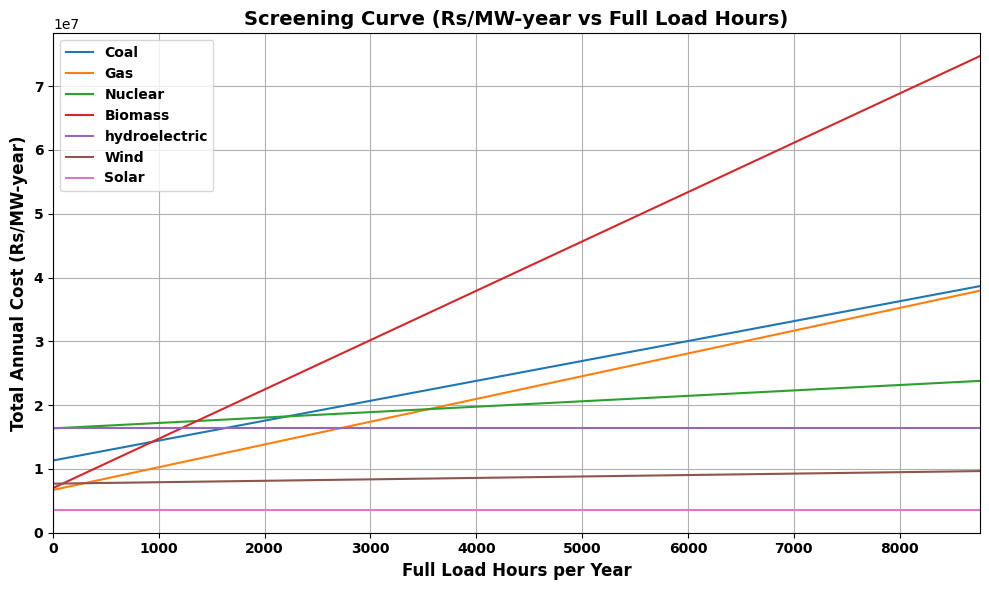

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hourly range from 0 to 8760 hours (full year)
hours = np.linspace(0, 8760, 300)

# Data per technology
techs = {
    'Coal': {
        'fixed': 11322500,
        'variable': 3120
    },
    'Gas': {
        'fixed': 6704100,
        'variable': 3565.7
    },
    'Nuclear': {
        'fixed': 16353600,
        'variable':850
    },
    'Biomass': {
        'fixed':7000000,
        'variable': 7730
    }, # Added comma here
    'hydroelectric': {
        'fixed':16424000,
        'variable': 0  #$/kWh
    }, # Added comma here
    'Wind': {
        'fixed':7690000,
        'variable': 225  # $/kWh
    }, # Added comma here
    'Solar': {
        'fixed':3527000,
        'variable': 0  # $/kWh
    }
}

# Plotting each curve
plt.figure(figsize=(10, 6))
for tech, cost in techs.items():
    total_cost = cost['fixed'] + cost['variable'] * hours
    plt.plot(hours, total_cost, label=tech)

# Formatting
plt.title("Screening Curve (Rs/MW-year vs Full Load Hours)")
plt.xlabel("Full Load Hours per Year")
plt.ylabel("Total Annual Cost (Rs/MW-year)")
plt.xlim(0, 8760)
plt.ylim(0, None)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

best fit polynomial

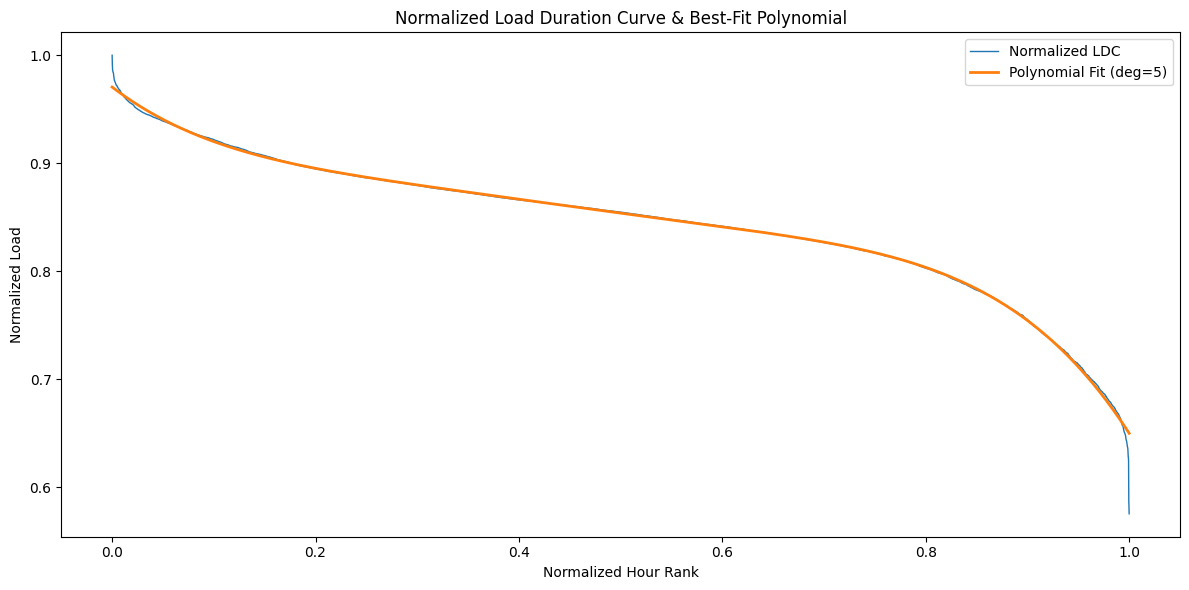

Polynomial coefficients (highest degree first):
[-3.04238876  6.82096957 -6.05021516  2.6688454  -0.71783999  0.97053625]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the modified 2030 profile CSV
df = pd.read_csv('India_2030_LoadProfile_Modified.csv', parse_dates=['Datetime'])

# Create a load-duration curve
sorted_load = df['Load_MW'].sort_values(ascending=False).reset_index(drop=True)
n = len(sorted_load)

# Normalize axes
x = sorted_load.index / (n - 1)          # Normalized hour rank (0–1)
y = sorted_load / sorted_load.max()      # Normalized load (0–1)

# Fit a polynomial of chosen degree
degree = 5
coeffs = np.polyfit(x, y, degree)
poly = np.poly1d(coeffs)

# Generate fitted curve
x_fit = np.linspace(0, 1, n)
y_fit = poly(x_fit)

# Plot original and fitted curves
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Normalized LDC', linewidth=1)
plt.plot(x_fit, y_fit, label=f'Polynomial Fit (deg={degree})', linewidth=2)
plt.xlabel('Normalized Hour Rank')
plt.ylabel('Normalized Load')
plt.title('Normalized Load Duration Curve & Best-Fit Polynomial')
plt.legend()
plt.tight_layout()
plt.show()

# Print coefficients
print("Polynomial coefficients (highest degree first):")
print(coeffs)


out put of above
Polynomial coefficients (highest degree first):
[-3.04238876  6.82096957 -6.05021516  2.6688454  -0.71783999  0.97053625]
$
P(x) = -3.04238876x^5 + 6.82096957x^4 - 6.05021516x^3 + 2.66884540x^2 - 0.71783999x + 0.97053625
$



In [ ]:
+------------------+----------------+----------------+------------+
|                  | Area Original  | Area Fitted    | Difference |
+------------------+----------------+----------------+------------+
|                  | 0.845809       | 0.845807       | 0.000003   |
+------------------+----------------+----------------+------------+ area of blocks sum is .84740369

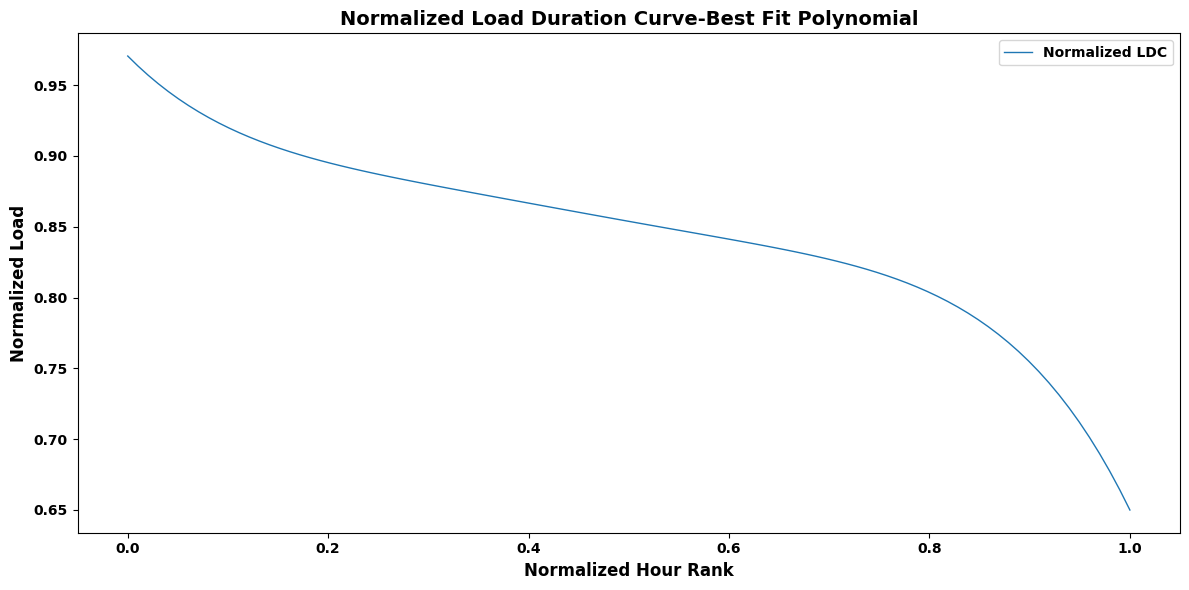

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given polynomial coefficients in descending order of power
coefficients = [-3.04238876, 6.82096957, -6.05021516, 2.66884540, -0.71783999, 0.97053625]

# Create a polynomial object
poly = np.poly1d(coefficients)

# Generate a list of x values from 0 to 1
x = np.linspace(0, 1, 100)

# Evaluate the polynomial for each x value to get the y values
y = poly(x)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Normalized LDC', linewidth=1)
plt.title('Normalized Load Duration Curve-Best Fit Polynomial')
plt.xlabel('Normalized Hour Rank')
plt.ylabel('Normalized Load')
plt.legend()
plt.tight_layout()



y_i values

In [ ]:
import numpy as np

def evaluate_polynomial(coefficients, x_values):
    """
    Evaluates a polynomial for a given list of x values.

    Args:
        coefficients (list): The coefficients of the polynomial in descending order of power.
        x_values (list): A list of x values to evaluate the polynomial at.

    Returns:
        list: A list of y values corresponding to the evaluated polynomial.
    """
    # Create a polynomial object
    poly = np.poly1d(coefficients)

    # Evaluate the polynomial at each x value
    y_values = poly(x_values)

    return y_values

# Given polynomial coefficients
polynomial_coefficients = [-3.04238876, 6.82096957, -6.05021516, 2.6688454, -0.71783999, 0.97053625]

# Assuming x_i is a list of 100 values
# For demonstration, we create a sample list using numpy.linspace
x_i = np.linspace(0, 1, 100)

# Get the list of y_i values
y_i = evaluate_polynomial(polynomial_coefficients, x_i)

# Print the first 5 values to show the result
print("First 5 y_i values:", y_i)

First 5 y_i values: [0.97053625 0.96355148 0.95707489 0.95107157 0.94550825 0.94035324
 0.93557641 0.93114912 0.92704423 0.92323602 0.91970017 0.91641373
 0.91335504 0.91050377 0.90784078 0.90534818 0.90300922 0.90080828
 0.89873085 0.89676344 0.89489361 0.89310986 0.89140164 0.88975932
 0.88817409 0.88663798 0.88514382 0.88368515 0.88225625 0.88085204
 0.87946808 0.87810053 0.87674608 0.87540197 0.87406588 0.87273594
 0.87141068 0.870089   0.86877011 0.8674535  0.86613891 0.8648263
 0.86351577 0.86220759 0.86090209 0.85959966 0.8583007  0.85700562
 0.85571471 0.85442822 0.85314622 0.85186862 0.85059511 0.84932513
 0.84805783 0.84679202 0.84552615 0.84425825 0.84298593 0.84170628
 0.84041591 0.83911083 0.83778647 0.83643761 0.83505839 0.83364218
 0.83218165 0.83066864 0.82909418 0.82744843 0.82572063 0.82389911
 0.82197117 0.81992312 0.8177402  0.81540656 0.8129052  0.81021796
 0.80732545 0.80420704 0.8008408  0.79720349 0.79327048 0.78901576
 0.78441184 0.77942978 0.77403912 0.7682078

block areas with x axis

In [ ]:
x_i = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.0, ]
ar_i = [6.91749766970395e-05, 0.0001283816814417, 0.0001786368555666, 0.0002208946797893, 0.0002560485996462, 0.0002849331509254, 0.0003083257851002, 0.0003269486947622, 0.0003414706390548, 0.0003525087691057, 0.0003606304534618, 0.0003663551035203, 0.0003701559989635, 0.0003724621131918, 0.0003736599387562, 0.0003740953127929, 0.0003740752424549, 0.0003738697303465, 0.0003737135999565, 0.0003738083210909, 0.0003743238353061, 0.0003754003813428, 0.0003771503205584, 0.0003796599623618, 0.0003829913896442, 0.0003871842842155, 0.0003922577522336, 0.0003982121496424, 0.0004050309076, 0.0004126823579169, 0.0004211215584852, 0.0004302921187139, 0.0004401280249617, 0.0004505554659714, 0.0004614946582998, 0.0004728616717561, 0.0004845702548298, 0.0004965336601273, 0.0005086664698053, 0.0005208864210016, 0.0005331162312698, 0.000545285424014, 0.0005573321539204, 0.000569205032388, 0.0005808649529691, 0.0005922869167944, 0.0006034618580117, 0.0006143984692166, 0.000625125026888, 0.0006356912168175, 0.0006461699595483, 0.0006566592358008, 0.0006672839119159, 0.0006781975652766, 0.0006895843097527, 0.0007016606211255, 0.0007146771625243, 0.0007289206098603, 0.0007447154772601, 0.0007624259424954, 0.0007824576724221, 0.0008052596484073, 0.0008313259917665, 0.0008611977891973, 0.0008954649182089, 0.0009347678725604, 0.0009797995876877, 0.0010313072661455, 0.00109009420303, 0.0011570216114205, 0.0012330104478119, 0.0013190432375411, 0.0014161659002276, 0.0015254895752052, 0.001648192446951, 0.0017855215705265, 0.0019387946969999, 0.0021094020988934, 0.0022988083956005, 0.0025085543788351, 0.0027402588380525, 0.0029956203858876, 0.0032764192835891, 0.0035845192664526, 0.0039218693692486, 0.0042905057516662, 0.004692553523734, 0.0051302285712621, 0.0056058393812742, 0.0061217888674364, 0.0066805761954941, 0.0072847986087068, 0.0079371532532783, 0.0086404390037876, 0.0093975582886275, 0.01021151891544, 0.0110854358965374, 0.0120225332743476, 0.0130261459468446, 0.014099721492976, 0.64990731]


In [ ]:
y_i = [0.97053625, 0.96355148, 0.95707489, 0.95107157, 0.94550825, 0.94035324,
       0.93557641, 0.93114912, 0.92704423, 0.92323602, 0.91970017, 0.91641373,
       0.91335504, 0.91050377, 0.90784078, 0.90534818, 0.90300922, 0.90080828,
       0.89873085, 0.89676344, 0.89489361, 0.89310986, 0.89140164, 0.88975932,
       0.88817409, 0.88663798, 0.88514382, 0.88368515, 0.88225625, 0.88085204,
       0.87946808, 0.87810053, 0.87674608, 0.87540197, 0.87406588, 0.87273594,
       0.87141068, 0.87008900, 0.86877011, 0.86745350, 0.86613891, 0.86482630,
       0.86351577, 0.86220759, 0.86090209, 0.85959966, 0.85830070, 0.85700562,
       0.85571471, 0.85442822, 0.85314622, 0.85186862, 0.85059511, 0.84932513,
       0.84805783, 0.84679202, 0.84552615, 0.84425825, 0.84298593, 0.84170628,
       0.84041591, 0.83911083, 0.83778647, 0.83643761, 0.83505839, 0.83364218,
       0.83218165, 0.83066864, 0.82909418, 0.82744843, 0.82572063, 0.82389911,
       0.82197117, 0.81992312, 0.81774020, 0.81540656, 0.81290520, 0.81021796,
       0.80732545, 0.80420704, 0.80084080, 0.79720349, 0.79327048, 0.78901576,
       0.78441184, 0.77942978, 0.77403912, 0.76820781, 0.76190223, 0.75508712,
       0.74772554, 0.73977884, 0.73120661, 0.72196668, 0.71201501, 0.70130573,
       0.68979104, 0.67742123, 0.66414456, 0.64990731]

In [ ]:
print(len(y_i))

100


In [ ]:
print(len(x_i))

100


In [ ]:
print(len(ar_i))

101


data for var covar matrix

In [ ]:
import pandas as pd

# === Parameters ===
file_path = '/content/fuel cost data.xlsx'           # Path to your Excel file
sheet_name = 'Sheet1'                  # Sheet name to read from
column_name_1 = 'coal_inr/mwh(2030)'       # The column you want to extract
column_name_2 = 'gas_inr/mwh(2030)'       # The column you want to extract
column_name_3 = 'nuclear_inr/mwh(2030)'       # The column you want to extract
column_name_4 = 'solar_inr/mwh(2030)'       # The column you want to extract
column_name_5 = 'wind_inr/mwh(2030)'       # The column you want to extract
column_name_6 = 'hydro_inr/mwh(2030)'       # The column you want to extract
column_name_7 = 'biomass_inr/mwh(2030)'       # The column you want to extract

# === Load the Excel sheet ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# === Convert the specified column to a list ===
c_i = df[column_name_1].dropna().tolist()
g_i = df[column_name_2].dropna().tolist()
n_i = df[column_name_3].dropna().tolist()
s_i = df[column_name_4].dropna().tolist()
w_i = df[column_name_5].dropna().tolist()
h_i = df[column_name_6].dropna().tolist()
b_i = df[column_name_7].dropna().tolist()

# === Output sample ===
print(c_i)
print(g_i)


[1120.0992354449697, 1122.0335048366292, 1132.1763783319, 1132.1763783319, 1132.1763783319, 1156.3806907790197, 1208.4445755846946, 1212.6804761822873, 1225.1452419819432, 1294.3046036113496, 1294.3046036113496, 1294.3046036113496, 1270.9213241143593, 1214.7603198409286, 1205.5588233190026, 1219.0543515511606, 1217.98584727687, 1217.98584727687, 1217.98584727687, 1206.1109505760962, 1209.721468460877, 1215.1997539810832, 1220.6705463456578, 1219.4738105159072, 1219.4738105159072, 1219.4738105159072, 1221.5253576526227, 1256.5627618228718, 1219.1318859931214, 1213.3588039552878, 1213.443594926913, 1213.443594926913, 1213.443594926913, 1132.1728289423904, 1173.7289827300087, 1193.9179102622525, 1189.5892325666377, 1174.690078533964, 1174.690078533964, 1174.690078533964, 1193.4863636543423, 1199.0252845786754, 1195.8633306526224, 1196.9691035167668, 1195.3718289402407, 1195.3718289402407, 1195.3718289402407, 1192.2133159501288, 1189.955608439381, 1183.8515458297506, 1183.0541163198627, 11

var-covar matrix

In [ ]:
import numpy as np

# Define the six datasets (each of length 12)
data = np.array([
    c_i, g_i, n_i, s_i, w_i, h_i, b_i
])

# Compute the 6x6 variance-covariance matrix
# Set rowvar=False because rows are variables
cov_matrix = np.cov(data, rowvar=True)

# Print result
print("7x Variance-Covariance Matrix:")
print(cov_matrix)

7x Variance-Covariance Matrix:
[[ 2.85240461e+04  1.10085770e+04 -2.34146210e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.10085770e+04  6.97801747e+04 -9.25826180e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.34146210e+02 -9.25826180e+01  4.27035373e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]


Mathematical Formulation(for three tech and n=101 block system)

Objective Function to Minimize
\begin{equation}
\begin{bmatrix}\frac{1}{x_1} & \frac{1}{x_2} & \frac{1}{x_3} & ...\frac{1}{1(x_n=1)} \end{bmatrix}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
1292.52 \\ 765.3 \\ 1866.849 \\402.62\\877.99\\1874.88\\799
\end{bmatrix}
\end{equation}

\begin{equation}
+ \left(
\begin{bmatrix}
a_1 + a_2 + ... a_{n} \\
b_1 + b_2 + ... b_{n} \\
c_1 + c_2 + ... c_{n} \\
d_1 + d_2 + ... d_{n} \\
e_1 + e_2 + ... e_{n} \\
f_1 + f_2 + ... f_{n} \\  
g_1 + g_2 + ... g_{n}
\end{bmatrix}
\right)^T
\begin{bmatrix}
3120 \\ 3565.7 \\ 850 \\0 \\225\\0\\7730
\end{bmatrix}
\end{equation}

\begin{equation}
+ \beta \cdot
\begin{bmatrix} 1 & 1 & ... 1({n}^{th}  time)  \end{bmatrix}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
 2.85240461e+04 & 1.10085770e+04 & -2.34146210e+02 & 0.0 & 0.0 & 0.0 & 0.0\\
1.10085770e+04 &  6.97801747e+04 & -9.25826180e+01 & 0.0 & 0.0 & 0.0 & 0.0\\
-2.34146210e+02 & -9.25826180e+01 & 4.27035373e+00   & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0\\
0.0           & 0.0           & 0.0           & 0.0 & 0.0 & 0.0 & 0.0
\end{bmatrix}
\begin{bmatrix}
a_1 & a_2 & . & a_{n}  \\
b_1 & b_2 & . & b_{n}  \\
c_1 & c_2 & . & c_{n}  \\
d_1 & d_2 & . & d_{n}  \\
e_1 & e_2 & . & e_{n}  \\
f_1 & f_2 & . & f_{n}  \\
g_1 & g_2 & . & g_{n}
\end{bmatrix}
\begin{bmatrix}
1 \\ 1 \\ 1 \\ . \\ 1({n}^{th}  time)
\end{bmatrix}
\end{equation}

Constraints
\begin{equation}
\begin{bmatrix}
a_1 & b_1 & c_1 & d_1 & e_1 & f_1& g_1 \\
a_2 & b_2 & c_2 & d_2 & e_2 & f_2 & g_2 \\
. & .& . & . & . & . \\
a_{n} & b_{n} & c_{n} & d_{n} & e_{n} & f_{n} &g_{n}\\
\end{bmatrix}
\begin{bmatrix}
1 \\ 1 \\ 1 \\ 1 \\ 1\\1\\1
\end{bmatrix}
=
\begin{bmatrix}
ar_1 \\ ar_2 \\ . \\ ar_{n}
\end{bmatrix}
\end{equation}

\begin{equation}
a_i, b_i, c_i, d_i, e_i, f_i , g_i \geq 0
\end{equation}

problem solution

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd

# Provided data
n = 101
# Ensure x has n (101) elements
x = np.linspace(0, 1, n) # Modified to create x with 101 elements
ar = np.array(ar_i)

# Change beta here as needed
beta = 0.000

fixed_cost = np.array([1292.52, 765.3, 1866.849, 402.62, 877.99,1874.88, 799])
var_cost = np.array([3120, 3465.7, 850, 0, 225, 0 , 7730])

cov = np.zeros((7, 7))
cov[0:3, 0:3] = np.array([
    [28524.0461, 11008.577, -234.14621],
    [11008.577, 69780.1747, -92.582618],
    [-234.14621, -92.582618, 4.27035373]
])

A = cp.Variable((n, 7), nonneg=True)

term1 = cp.sum(cp.sum(cp.multiply(A, fixed_cost), axis=1) / x)
term2 = cp.sum(cp.sum(A, axis=0) * var_cost)
S = cp.sum(A, axis=0)
risk_term = cp.quad_form(S, cov)
term3 = beta * risk_term

constraints = [
    cp.sum(A, axis=1) == ar,
    A >= 0
]

objective = cp.Minimize(term1 + term2 + term3)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.OSQP, verbose=True)

solution = A.value
# Round off all numbers with more than 5 zeros after decimal to 0
solution[np.abs(solution) < 0.00001] = 0.0

columns = ['a', 'b', 'c', 'd', 'e', 'f','g']
df = pd.DataFrame(solution, columns=columns)
df['x'] = x
df['ar'] = ar

# Make beta "pretty" in filename, e.g. 0.1 → 0p1, 2 → 2, 0.05 → 0p05
beta_str = str(beta).replace('.', 'p')
filename = f'solution_beta_{beta_str}.csv'
df.to_csv(filename, index=False)

print(f"Optimization complete. Solution saved as {filename}.")

/usr/local/lib/python3.12/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
(CVXPY) Aug 29 03:53:05 AM: Your problem has 707 variables, 808 constraints, and 0 parameters.
(CVXPY) Aug 29 03:53:05 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 29 03:53:05 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 29 03:53:05 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 29 03:53:05 AM: Your problem is compiled with the CPP canonica

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-----------------------------------------------------------------
           OSQP v1.0.0  -  Operator Splitting QP Solver
              (c) The OSQP Developer Team
-----------------------------------------------------------------
problem:  variables n = 714, constraints m = 1522
          nnz(P) + nnz(A) = 2835
settings: algebra = Built-in,
          OSQPInt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

# =========================
# 1) Load the LDC points (x_i, y_i, ar_i) from CSV
# =========================
ldc_path = Path("/content/polynomial_values_with_ar.csv")

# Try UTF-8 first; fall back to latin-1 if needed. Use Python engine to auto-detect delimiter.
try:
    df = pd.read_csv(ldc_path, encoding="utf-8-sig", engine="python")
except UnicodeDecodeError:
    df = pd.read_csv(ldc_path, encoding="latin1", engine="python")

# Clean headers and ensure required cols exist
df.columns = [str(c).strip() for c in df.columns]
needed_cols = ["x_i", "y_i", "ar_i"]
missing = [c for c in needed_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in {ldc_path.name}: {missing}. Expected {needed_cols}")

# Keep only the needed cols, make numeric, drop NaNs
df = df[needed_cols].copy()
df = df.apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)

# =========================
# 2) Load 7-tech allocations per block from CSV
#    Expected columns: a,b,c,d,e,f,g  (coal, gas, nuclear, solar, wind, hydro, biomass)
# =========================
alloc_path = Path("/content/solution_beta_0p0.csv")
try:
    alloc_df = pd.read_csv(alloc_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    alloc_df = pd.read_csv(alloc_path, encoding="latin1")

alloc_df.columns = [str(c).strip() for c in alloc_df.columns]
tech_cols = ["a","b","c","d","e","f","g"]
missing_alloc = [c for c in tech_cols if c not in alloc_df.columns]
if missing_alloc:
    raise ValueError(f"Missing columns in {alloc_path.name}: {missing_alloc}. Expected {tech_cols}")

# Convert to numeric and zero-out tiny noise (<1e-5)
alloc_df = alloc_df[tech_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0)
alloc = alloc_df.to_numpy()
alloc[np.abs(alloc) < 1e-5] = 0.0

# Align lengths if files differ (trim to the shorter)
n = min(len(df), len(alloc))
if len(df) != len(alloc):
    print(f"[info] Row count mismatch: LDC={len(df)}, alloc={len(alloc)}. Using first {n} rows.")
df = df.iloc[:n].reset_index(drop=True)
alloc = alloc[:n, :]

# =========================
# 3) Tech names & colors (order must match columns a..g)
# =========================
tech_names = ['coal','gas','nuclear','solar','wind','hydro','biomass']  # a..g
color_map = {
    'coal'   : 'yellow',       # a
    'gas'    : 'orange',       # b
    'nuclear': 'lightgreen',   # c
    'solar'  : 'gold',         # d
    'wind'   : 'skyblue',      # e
    'hydro'  : 'deepskyblue',  # f
    'biomass': 'sandybrown'    # g
}

# =========================
# 4) Plot each block colored by the dominant tech
# =========================
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n - 1):
    idx  = int(np.argmax(alloc[i, :]))       # dominant tech index for block i
    tech = tech_names[idx]
    color = color_map[tech]

    x_next = df.loc[i+1, "x_i"]
    y_n    = df.loc[i,   "y_i"]
    y_np1  = df.loc[i+1, "y_i"]

    ax.fill_between([0, x_next], [y_np1, y_np1], [y_n, y_n], color=color, alpha=0.4)

# Overlay the discretized curve (y_i vs x_i)
ax.plot(df["x_i"], df["y_i"], color='black', linewidth=1.5, label='LDC')

# Labels & title
ax.set_xlabel("Normalized Time (Duration)")
ax.set_ylabel("Normalized Load")
ax.set_title("Discretized LDC with Resource Coloring (7 Technologies)")

# Legend
legend_elements = [
    Patch(facecolor=color_map['coal'],    alpha=0.4, label='Coal (a)'),
    Patch(facecolor=color_map['gas'],     alpha=0.4, label='Gas (b)'),
    Patch(facecolor=color_map['nuclear'], alpha=0.4, label='Nuclear (c)'),
    Patch(facecolor=color_map['solar'],   alpha=0.4, label='Solar (d)'),
    Patch(facecolor=color_map['wind'],    alpha=0.4, label='Wind (e)'),
    Patch(facecolor=color_map['hydro'],   alpha=0.4, label='Hydro (f)'),
    Patch(facecolor=color_map['biomass'], alpha=0.4, label='Biomass (g)'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/polynomial_values_with_ar.csv'

[info] Row count mismatch: LDC=100, alloc=101. Using first 100 rows.


NameError: name 'legend_elements' is not defined

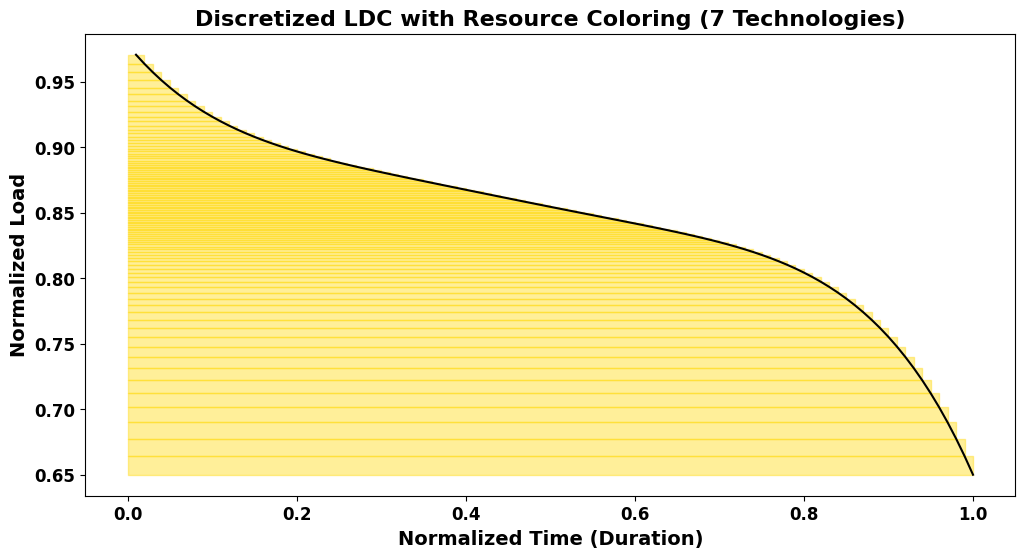

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

# =========================
# 1) Use the loaded x_i, y_i, ar_i data
# =========================
# Assuming x_i, y_i, and ar_i are already loaded in the previous cell
# If not, uncomment the following lines and adjust the path as needed:
# import pandas as pd
# df_solution = pd.read_csv('/content/solution_beta_0.csv')
# x_i = df_solution['x'].tolist()
# ar_i = df_solution['ar'].tolist()
# # You might need to regenerate y_i if it's not in the CSV or recalculate based on a polynomial
# # y_i = ... # code to get y_i


# Create a DataFrame from the lists for consistent processing
# Ensure all lists have the same length before creating the DataFrame
min_len = min(len(x_i), len(y_i), len(ar_i))
df = pd.DataFrame({'x_i': x_i[:min_len], 'y_i': y_i[:min_len], 'ar_i': ar_i[:min_len]})


# =========================
# 2) Load 7-tech allocations per block from CSV
#    Expected columns: a,b,c,d,e,f,g  (coal, gas, nuclear, solar, wind, hydro, biomass)
# =========================
alloc_path = Path("/content/solution_beta_0p0 (1).csv")
try:
    alloc_df = pd.read_csv(alloc_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    alloc_df = pd.read_csv(alloc_path, encoding="latin1")

alloc_df.columns = [str(c).strip() for c in alloc_df.columns]
tech_cols = ["a","b","c","d","e","f","g"]
missing_alloc = [c for c in tech_cols if c not in alloc_df.columns]
if missing_alloc:
    raise ValueError(f"Missing columns in {alloc_path.name}: {missing_alloc}. Expected {tech_cols}")

# Convert to numeric and zero-out tiny noise (<1e-5)
alloc_df = alloc_df[tech_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0)
alloc = alloc_df.to_numpy()
alloc[np.abs(alloc) < 1e-5] = 0.0

# Align lengths if files differ (trim to the shorter)
n = min(len(df), len(alloc))
if len(df) != len(alloc):
    print(f"[info] Row count mismatch: LDC={len(df)}, alloc={len(alloc)}. Using first {n} rows.")
df = df.iloc[:n].reset_index(drop=True)
alloc = alloc[:n, :]

# =========================
# 3) Tech names & colors (order must match columns a..g)
# =========================
tech_names = ['coal','gas','nuclear','solar','wind','hydro','biomass']  # a..g
color_map = {
    'coal'   : 'yellow',       # a
    'gas'    : 'orange',       # b
    'nuclear': 'lightgreen',   # c
    'solar'  : 'gold',         # d
    'wind'   : 'skyblue',      # e
    'hydro'  : 'deepskyblue',  # f
    'biomass': 'sandybrown'    # g
}

# =========================
# 4) Plot each block colored by the dominant tech
# =========================
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n - 1):
    idx  = int(np.argmax(alloc[i, :]))       # dominant tech index for block i
    tech = tech_names[idx]
    color = color_map[tech]

    x_next = df.loc[i+1, "x_i"]
    y_n    = df.loc[i,   "y_i"]
    y_np1  = df.loc[i+1, "y_i"]

    ax.fill_between([0, x_next], [y_np1, y_np1], [y_n, y_n], color=color, alpha=0.4)

# Overlay the discretized curve (y_i vs x_i)
ax.plot(df["x_i"], df["y_i"], color='black', linewidth=1.5, label='LDC')

# Labels & title
ax.set_xlabel("Normalized Time (Duration)", fontsize=14, fontweight='bold')
ax.set_ylabel("Normalized Load", fontsize=14, fontweight='bold')
ax.set_title("Discretized LDC with Resource Coloring (7 Technologies)", fontsize=16, fontweight='bold')

# Tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

# Legend
legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=14,  prop={'weight': 'bold'}) # Increased fontsize to 14
# Attempt to set font properties directly on legend text
for text in legend.get_texts():
    text.set_fontsize(14) # Set fontsize again
    text.set_fontweight('bold') # Set fontweight

plt.tight_layout()
plt.show()

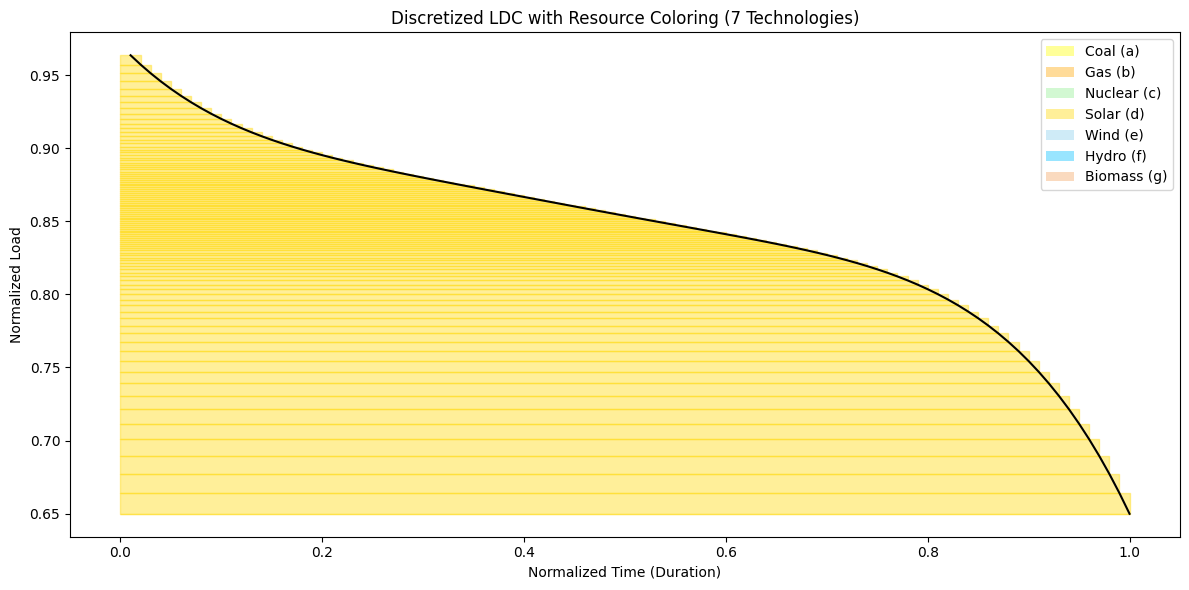

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

# =========================
# 1) Load the LDC points (x_i, y_i, ar_i) from CSV
# =========================
ldc_path = Path("/content/polynomial_values_with_ar.csv")

# Try UTF-8 first; fall back to latin-1 if needed. Use Python engine to auto-detect delimiter.
try:
    df = pd.read_csv(ldc_path, encoding="utf-8-sig", engine="python")
except UnicodeDecodeError:
    df = pd.read_csv(ldc_path, encoding="latin1", engine="python")

# Clean headers and ensure required cols exist
df.columns = [str(c).strip() for c in df.columns]
needed_cols = ["x_i", "y_i", "ar_i"]
missing = [c for c in needed_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in {ldc_path.name}: {missing}. Expected {needed_cols}")

# Keep only the needed cols, make numeric, drop NaNs
df = df[needed_cols].copy()
df = df.apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)

# =========================
# 2) Load 7-tech allocations per block from CSV
#    Expected columns: a,b,c,d,e,f,g  (coal, gas, nuclear, solar, wind, hydro, biomass)
# =========================
alloc_path = Path("/content/solution_beta_0p0.csv")
try:
    alloc_df = pd.read_csv(alloc_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    alloc_df = pd.read_csv(alloc_path, encoding="latin1")

alloc_df.columns = [str(c).strip() for c in alloc_df.columns]
tech_cols = ["a","b","c","d","e","f","g"]
missing_alloc = [c for c in tech_cols if c not in alloc_df.columns]
if missing_alloc:
    raise ValueError(f"Missing columns in {alloc_path.name}: {missing_alloc}. Expected {tech_cols}")

# Convert to numeric and zero-out tiny noise (<1e-5)
alloc_df = alloc_df[tech_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0)
alloc = alloc_df.to_numpy()
alloc[np.abs(alloc) < 1e-5] = 0.0

# Align lengths if files differ (trim to the shorter)
n = min(len(df), len(alloc))
if len(df) != len(alloc):
    print(f"[info] Row count mismatch: LDC={len(df)}, alloc={len(alloc)}. Using first {n} rows.")
df = df.iloc[:n].reset_index(drop=True)
alloc = alloc[:n, :]

# =========================
# 3) Tech names & colors (order must match columns a..g)
# =========================
tech_names = ['coal','gas','nuclear','solar','wind','hydro','biomass']  # a..g
color_map = {
    'coal'   : 'yellow',       # a
    'gas'    : 'orange',       # b
    'nuclear': 'lightgreen',   # c
    'solar'  : 'gold',         # d
    'wind'   : 'skyblue',      # e
    'hydro'  : 'deepskyblue',  # f
    'biomass': 'sandybrown'    # g
}

# =========================
# 4) Plot each block colored by the dominant tech
# =========================
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n - 1):
    idx  = int(np.argmax(alloc[i, :]))       # dominant tech index for block i
    tech = tech_names[idx]
    color = color_map[tech]

    x_next = df.loc[i+1, "x_i"]
    y_n    = df.loc[i,   "y_i"]
    y_np1  = df.loc[i+1, "y_i"]

    ax.fill_between([0, x_next], [y_np1, y_np1], [y_n, y_n], color=color, alpha=0.4)

# Overlay the discretized curve (y_i vs x_i)
ax.plot(df["x_i"], df["y_i"], color='black', linewidth=1.5, label='LDC')

# Labels & title
ax.set_xlabel("Normalized Time (Duration)")
ax.set_ylabel("Normalized Load")
ax.set_title("Discretized LDC with Resource Coloring (7 Technologies)")

# Legend
legend_elements = [
    Patch(facecolor=color_map['coal'],    alpha=0.4, label='Coal (a)'),
    Patch(facecolor=color_map['gas'],     alpha=0.4, label='Gas (b)'),
    Patch(facecolor=color_map['nuclear'], alpha=0.4, label='Nuclear (c)'),
    Patch(facecolor=color_map['solar'],   alpha=0.4, label='Solar (d)'),
    Patch(facecolor=color_map['wind'],    alpha=0.4, label='Wind (e)'),
    Patch(facecolor=color_map['hydro'],   alpha=0.4, label='Hydro (f)'),
    Patch(facecolor=color_map['biomass'], alpha=0.4, label='Biomass (g)'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()
